# <center> Melanoma Detection


> Using Convolution Neural Network

### Importing libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

Following variables will be used throught the notebook:

1. ***data_dir_train*** : Path to train dataset directory
2. ***data_dir_test*** : Path to test dataset directory
3. ***img_size*** : Image size (180, 180)
4. ***batch_size*** : Batch Size (32)
5. ***class_names*** : Names of classes
6. ***num_classes*** : Total number of classes


In [ ]:
### Mount Google Drive, as my data was stored in google drive

from google.colab import drive
drive.mount('/content/drive')

[Skin Cancer Dataset](https://drive.google.com/drive/folders/146HBopGnLQ_w_j663aUNhW17ZMDRumVs?usp=sharing) (Google Drive Link)

In [2]:
### Paths to train and test datasets
data_dir_train = pathlib.Path('/content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Test')

In [ ]:
data_dir_train, data_dir_test

(PosixPath('/content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train'),
 PosixPath('/content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Test'))

In [ ]:
### Image count
img_cnt_train = len(list(data_dir_train.glob('*/*.jpg')))
img_cnt_test = len(list(data_dir_test.glob('*/*.jpg')))
print(img_cnt_train)
print(img_cnt_test)

2244
118


In [3]:
### Assigning image size and batch size, we will use these values in overall notebook
batch_size = 32
img_size = (180,180)

## 1. Importing Dataset

In [5]:
### Importing dataset using keras.preprocessing.image_dataset_from_directory

### Train dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical'
)

Found 6744 files belonging to 9 classes.
Using 5396 files for training.


In [6]:
### Validation dataset
val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical'
)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [7]:
### Input shape
input_shape = next(iter(train_ds))[0].shape[1:]
input_shape

TensorShape([180, 180, 3])

In [8]:
### Class names
class_names = train_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [9]:
### Number of classes
num_classes = len(class_names)
num_classes

9

## 2. Visualization

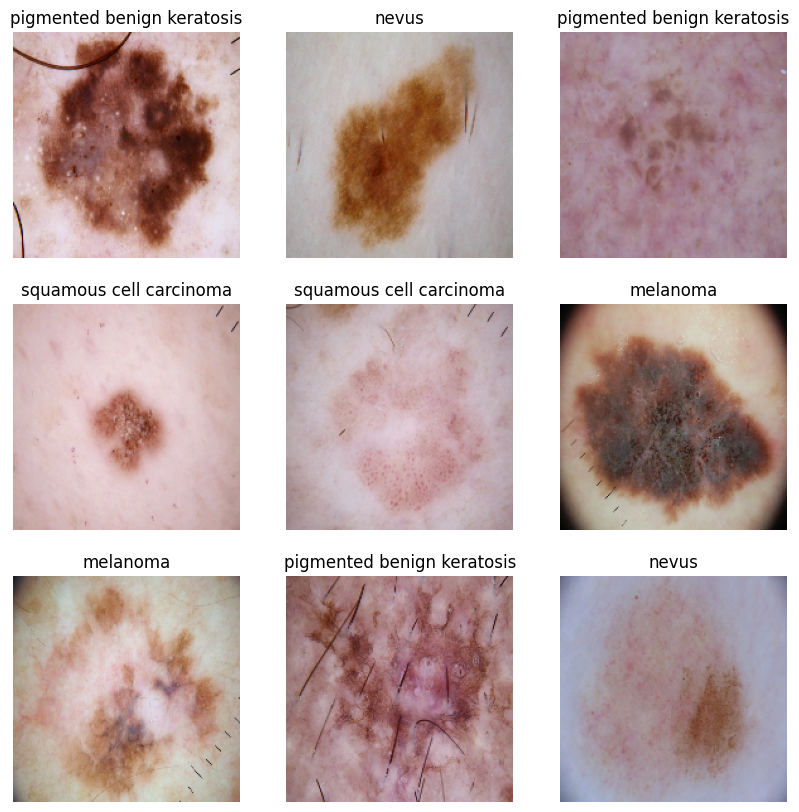

In [ ]:
#Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    label_index = tf.argmax(labels[i])
    plt.title(class_names[label_index])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 9)


In [ ]:
### Remove cache from dataset
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



---

## 3. Modelling

Following hyperparameters will be used all over modelling while compiling:

1. Optimizer : '**adam**'
2. Loss : '**categorical_crossentropy**'
3. Metrics : '**Accuracy**'

### Model 1

Layers:
* Rescaling layer
*   1 Convolution layer with: **32 (3,3)** filters, Padding as '**same**'
* Pooling Layer
*   1 Convolution layer with: **64 (3,3)** filters, Padding as '**same**'
* Pooling Layer
* Flatten Layer
* Dense layer with **128** Neurons
* Final Softmax layer


In [ ]:
#Building Model 1
model_1 = Sequential()
model_1.add(layers.experimental.preprocessing.Rescaling(scale=1./255))
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(180, 180, 3)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(9, activation='softmax'))

#Compile model 1
model_1.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

In [ ]:
## Fit Model 1
epochs = 20
history = model_1.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/20
57/57 [==============================] - 157s 3s/step - loss: 2.3138 - accuracy: 0.2634 - val_loss: 2.3698 - val_accuracy: 0.2609
Epoch 2/20
57/57 [==============================] - 139s 2s/step - loss: 1.8207 - accuracy: 0.3608 - val_loss: 2.4002 - val_accuracy: 0.2609
Epoch 3/20
57/57 [==============================] - 138s 2s/step - loss: 1.6980 - accuracy: 0.4087 - val_loss: 2.4490 - val_accuracy: 0.2174
Epoch 4/20
57/57 [==============================] - 135s 2s/step - loss: 1.4973 - accuracy: 0.4677 - val_loss: 2.6866 - val_accuracy: 0.1739
Epoch 5/20
57/57 [==============================] - 135s 2s/step - loss: 1.3908 - accuracy: 0.5039 - val_loss: 2.7760 - val_accuracy: 0.1739
Epoch 6/20
57/57 [==============================] - 135s 2s/step - loss: 1.2566 - accuracy: 0.5523 - val_loss: 2.6176 - val_accuracy: 0.1739
Epoch 7/20
57/57 [==============================] - 147s 3s/step - loss: 1.1001 - accuracy: 0.6097 - val_loss: 3.9834 - val_accuracy: 0.1739
Epoch 8/20
57

In [ ]:
# model_1.summary()

In [15]:
### Function to plot model history

#History Function
def train_results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

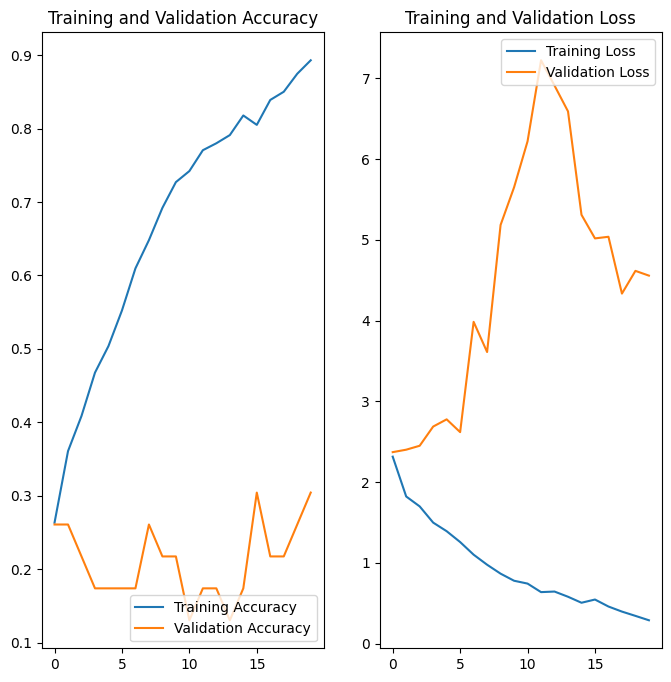

In [ ]:
train_results(history)

#### Findings:

* The model is clearly overfitting as we can see High training accuracy but low validation accuracy.
* Also, although training loss was decreasing but loss in Validation set kept on increasing and has vast difference with training loss.
* Thus, we can say the model is clearly overfitting

> As per above results, we can apply some augmentation techniques by adding 2 augmentation layers.


### Model 1 with augmentation layers

   Added 2 augmentation layers:
1.  Flip Horizontal
2.  Rotation

In [ ]:
# Building model with Augmented layers
aug_model_1 = Sequential()
aug_model_1.add(layers.experimental.preprocessing.Rescaling(scale=1./255))                    ## Rescaling
aug_model_1.add(keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal"))        ## Augmentation 1
aug_model_1.add(keras.layers.experimental.preprocessing.RandomRotation(factor=0.2))           ## Augmentation 2
aug_model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(180, 180, 3)))
aug_model_1.add(MaxPooling2D(pool_size=(2, 2)))
aug_model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
aug_model_1.add(MaxPooling2D(pool_size=(2, 2)))
aug_model_1.add(Flatten())
aug_model_1.add(Dense(128, activation='relu'))
aug_model_1.add(Dense(9, activation='softmax'))

#Compile model
aug_model_1.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

In [ ]:
## Fit Augmented Model 1
epochs = 20
history = aug_model_1.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/20
57/57 [==============================] - 160s 3s/step - loss: 3.0191 - accuracy: 0.1949 - val_loss: 2.3106 - val_accuracy: 0.1739
Epoch 2/20
57/57 [==============================] - 137s 2s/step - loss: 2.0339 - accuracy: 0.2133 - val_loss: 2.5075 - val_accuracy: 0.1739
Epoch 3/20
57/57 [==============================] - 128s 2s/step - loss: 1.9276 - accuracy: 0.2929 - val_loss: 2.3167 - val_accuracy: 0.1739
Epoch 4/20
57/57 [==============================] - 150s 3s/step - loss: 1.6808 - accuracy: 0.4026 - val_loss: 2.0083 - val_accuracy: 0.2609
Epoch 5/20
57/57 [==============================] - 142s 2s/step - loss: 1.6189 - accuracy: 0.4232 - val_loss: 1.8752 - val_accuracy: 0.2609
Epoch 6/20
57/57 [==============================] - 128s 2s/step - loss: 1.5522 - accuracy: 0.4555 - val_loss: 3.2943 - val_accuracy: 0.2174
Epoch 7/20
57/57 [==============================] - 131s 2s/step - loss: 1.4409 - accuracy: 0.4994 - val_loss: 2.4797 - val_accuracy: 0.3043
Epoch 8/20
57

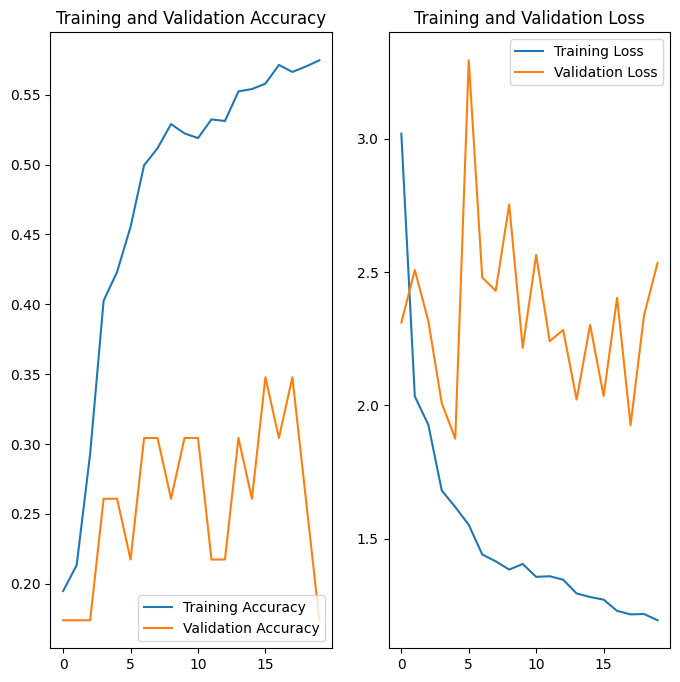

In [ ]:
train_results(history)

In [ ]:
aug_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        1

**Findings:**
* Even after augmentated layers there is no significant improvement in the model.
* We can see model is still overfitting.

> Lets build model with some new dropout layers and just one augmentation layer

### Model 2
* Same as model 1, just some new additions
* Only one Augmentation layer : RandomFlip
* 1 Dropout layer after each Convolution layer

In [ ]:
## Building Model 2 with DROPOUT layers
model_2 = Sequential()
model_2.add(layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=input_shape))   ## Rescaling
model_2.add(keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal"))        ## Augmentation 1
# model_2.add(keras.layers.experimental.preprocessing.RandomRotation(factor=0.2))         ## Augmentation 2
model_2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))    ## Dropout
model_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))    ## Dropout
# model_2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model_2.add(MaxPooling2D((2, 2)))
# model_2.add(Dropout(0.25))    ## Dropout
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))

#Compile model
model_2.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

In [ ]:
## Fit model 2
epochs = 20
history_2 = model_2.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/20
57/57 [==============================] - 134s 2s/step - loss: 4.1789 - accuracy: 0.1676 - val_loss: 2.1798 - val_accuracy: 0.1739
Epoch 2/20
57/57 [==============================] - 139s 2s/step - loss: 2.0128 - accuracy: 0.2528 - val_loss: 2.1577 - val_accuracy: 0.1739
Epoch 3/20
57/57 [==============================] - 138s 2s/step - loss: 1.8365 - accuracy: 0.3419 - val_loss: 2.0773 - val_accuracy: 0.2609
Epoch 4/20
57/57 [==============================] - 135s 2s/step - loss: 1.6181 - accuracy: 0.4237 - val_loss: 1.9762 - val_accuracy: 0.2609
Epoch 5/20
57/57 [==============================] - 136s 2s/step - loss: 1.5150 - accuracy: 0.4688 - val_loss: 1.8728 - val_accuracy: 0.2174
Epoch 6/20
57/57 [==============================] - 134s 2s/step - loss: 1.4686 - accuracy: 0.4772 - val_loss: 2.0389 - val_accuracy: 0.2609
Epoch 7/20
57/57 [==============================] - 135s 2s/step - loss: 1.3695 - accuracy: 0.5251 - val_loss: 2.1803 - val_accuracy: 0.1739
Epoch 8/20
57

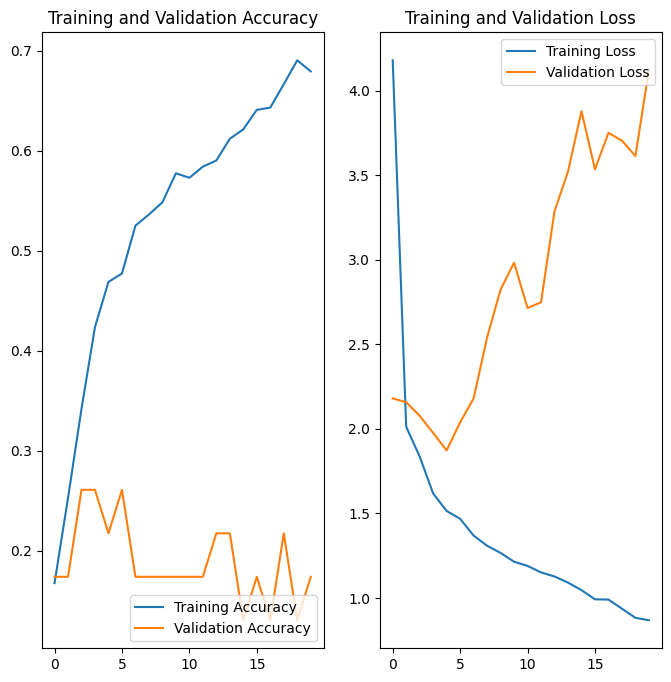

In [ ]:
train_results(history_2)

**Findings:**
* Still no improvement, so lets look at class imbalance now



---



---



## 4. Fixing Class Imbalance

In [ ]:
### Check class imbalance

# Count the number of samples in each class
class_counts = np.zeros(len(class_names))
for _, labels in train_ds:
    class_counts += np.sum(labels, axis=0)


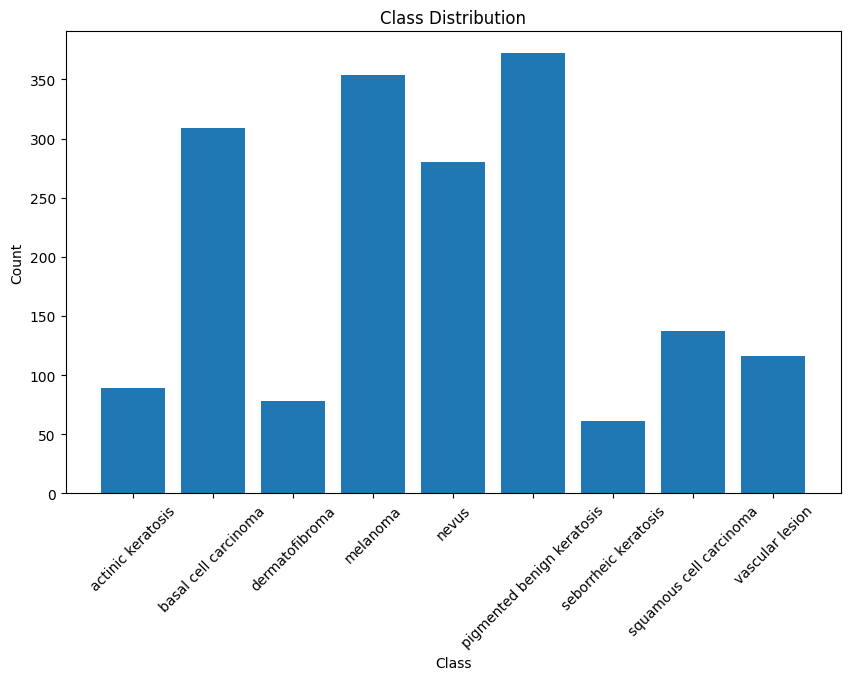

In [ ]:
#Plot
plt.figure(figsize=(10, 6))  # Set the figsize as desired
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)  # Rotate the xticks by 45 degrees for better visibility
plt.show()

#### Findings:

* **Seborrheic keratosis** has **Least** number of samples
* **Pigmented benign keratosis** has **Highest** number of samples

> So, lets Augment some new images using **Augmentor**

#### Augmenting images

In [ ]:
### Installing Augmentor
!pip install Augmentor

In [ ]:
### Augmenting images

path_to_train_ds = '/content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/'
import Augmentor
for i in class_names:
  p = Augmentor.Pipeline(path_to_train_ds + i)
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9B8C7729E0>: 100%|██████████| 500/500 [00:33<00:00, 14.87 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9B94E89840>: 100%|██████████| 500/500 [00:30<00:00, 16.44 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9B9C5949A0>: 100%|██████████| 500/500 [00:29<00:00, 17.11 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9C26E1E890>: 100%|██████████| 500/500 [02:16<00:00,  3.66 Samples/s]


Initialised with 362 image(s) found.
Output directory set to /content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7F9B87E02CE0>: 100%|██████████| 500/500 [01:56<00:00,  4.28 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9B8C3299F0>: 100%|██████████| 500/500 [00:25<00:00, 19.64 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9B9D0F08B0>: 100%|██████████| 500/500 [00:58<00:00,  8.51 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9B9C13FAF0>: 100%|██████████| 500/500 [00:27<00:00, 18.09 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9B8C63C1F0>: 100%|██████████| 500/500 [00:30<00:00, 16.30 Samples/s]


In [ ]:
### Count total augmented images
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


500 images in each class, 500*9 = 4500 new images

> ### Making new dataframe with total images (original and augmented images)

In [ ]:
### Dictionary for original images {'Image path' : 'Class label'}
org_ds_dict = {}
for class_name in class_names:
    class_path = os.path.join(data_dir_train, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        org_ds_dict[img_path] = class_name
len(org_ds_dict)

2253

In [ ]:
### Path list for augmented images
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# path_list_new[:5]

['/content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025223.jpg_12e54d72-00c0-4e76-8736-c843b946cbc1.jpg',
 '/content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025903.jpg_4f129b6e-7a1e-4e31-82d2-57f56b07775d.jpg',
 '/content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033626.jpg_23f16b6a-47f8-46dc-9f26-aff0861f8dfb.jpg',
 '/content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0028926.jpg_9e9048a3-6d8b-4b0b-a8fa-d480e121bc9a.jpg',
 '/content/drive/MyDrive/upGrad/Assignments/CNN - Melanoma Detection/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030321.jpg_fbe4a5be-92eb-4d03-9c01-dd01d268e52b.jpg']

In [ ]:
### List of class labels corresponding to images
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list_new[:5]

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma']

In [ ]:
### Dictionary for Augmented images {'Image path' : 'Class label'}
aug_ds_dict = dict(zip(path_list_new, lesion_list_new))
# len(aug_ds_dict)

4500

In [ ]:
## Create new dataframe by combining both dictionaries
df1 = pd.DataFrame(list(org_ds_dict.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(aug_ds_dict.items()),columns = ['Path','Label'])
new_df = df1.append(df2)
new_df

<ipython-input-87-699104ac3a4c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = df1.append(df2)


,Path,Label
0,/content/drive/MyDrive/upGrad/Assignments/CNN ...,actinic keratosis
1,/content/drive/MyDrive/upGrad/Assignments/CNN ...,actinic keratosis
2,/content/drive/MyDrive/upGrad/Assignments/CNN ...,actinic keratosis
3,/content/drive/MyDrive/upGrad/Assignments/CNN ...,actinic keratosis
4,/content/drive/MyDrive/upGrad/Assignments/CNN ...,actinic keratosis
...,...,...
4495,/content/drive/MyDrive/upGrad/Assignments/CNN ...,nevus
4496,/content/drive/MyDrive/upGrad/Assignments/CNN ...,nevus
4497,/content/drive/MyDrive/upGrad/Assignments/CNN ...,nevus
4498,/content/drive/MyDrive/upGrad/Assignments/CNN ...,nevus


In [ ]:
### Checking updated value counts
new_df['Label'].value_counts()

pigmented benign keratosis    963
melanoma                      939
basal cell carcinoma          877
nevus                         863
squamous cell carcinoma       682
vascular lesion               640
actinic keratosis             615
dermatofibroma                596
seborrheic keratosis          578
Name: Label, dtype: int64

* It seems now there are enough samples for each class which can help in improving models performance.

> Importing new dataset with original and augmented images

In [4]:
### New training Dataset
new_train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=img_size,
  batch_size=batch_size,
  label_mode = 'categorical'
)

### New validation dataset
new_val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=img_size,
  batch_size=batch_size,
  label_mode = 'categorical'
)

Found 6744 files belonging to 9 classes.
Using 5396 files for training.
Found 6744 files belonging to 9 classes.
Using 1348 files for validation.


In [5]:
### Input Shape
new_input_shape = next(iter(new_train_ds))[0].shape[1:]
### Class names
class_names = new_train_ds.class_names
### Number of classes
num_classes = len(class_names)

print(new_input_shape)
print(class_names)
print(num_classes)

(180, 180, 3)
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


In [ ]:
for image_batch, labels_batch in new_train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 9)


In [6]:
### Remove cache from dataset
AUTOTUNE = tf.data.AUTOTUNE

new_train_ds = new_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
new_val_ds = new_val_ds.cache().prefetch(buffer_size=AUTOTUNE)



---



### Model 3

Layers:
* Rescaling layer
*   1 Convolution layer with: **32 (3,3)** filters, Padding as '**same**'
* Pooling Layer
* Dropout Layer
*   1 Convolution layer with: **64 (3,3)** filters, Padding as '**same**'
* Pooling Layer
* Dropouts Layer
* Flatten Layer
* Dense layer : **128** Neurons
* Final Softmax layer


In [12]:
## Building Model 3 with DROPOUT layers
model_3 = Sequential()

model_3.add(layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=new_input_shape))   ## Rescaling
#Conv Layer 1
model_3.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))    ## Dropout
#Conv Layer 2
model_3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))    ## Dropout
model_3.add(Flatten())       ## Flatten Layer
#FC Layer
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(num_classes, activation='softmax'))

#Compile model
model_3.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)


In [13]:
## Fit Model 3
epochs = 30
history_3 = model_3.fit(
    new_train_ds,
    validation_data = new_val_ds,
    epochs = epochs
)

Epoch 1/30
169/169 [==============================] - 689s 4s/step - loss: 2.7898 - accuracy: 0.1395 - val_loss: 2.1906 - val_accuracy: 0.1417
Epoch 2/30
169/169 [==============================] - 416s 2s/step - loss: 2.0314 - accuracy: 0.2213 - val_loss: 1.8820 - val_accuracy: 0.2878
Epoch 3/30
169/169 [==============================] - 423s 3s/step - loss: 1.5893 - accuracy: 0.4135 - val_loss: 1.5709 - val_accuracy: 0.4080
Epoch 4/30
169/169 [==============================] - 417s 2s/step - loss: 1.3317 - accuracy: 0.5107 - val_loss: 1.3798 - val_accuracy: 0.4859
Epoch 5/30
169/169 [==============================] - 427s 3s/step - loss: 1.1689 - accuracy: 0.5738 - val_loss: 1.1939 - val_accuracy: 0.5497
Epoch 6/30
169/169 [==============================] - 419s 2s/step - loss: 1.0164 - accuracy: 0.6184 - val_loss: 1.1848 - val_accuracy: 0.5712
Epoch 7/30
169/169 [==============================] - 419s 2s/step - loss: 0.8935 - accuracy: 0.6866 - val_loss: 1.0623 - val_accuracy: 0.6239

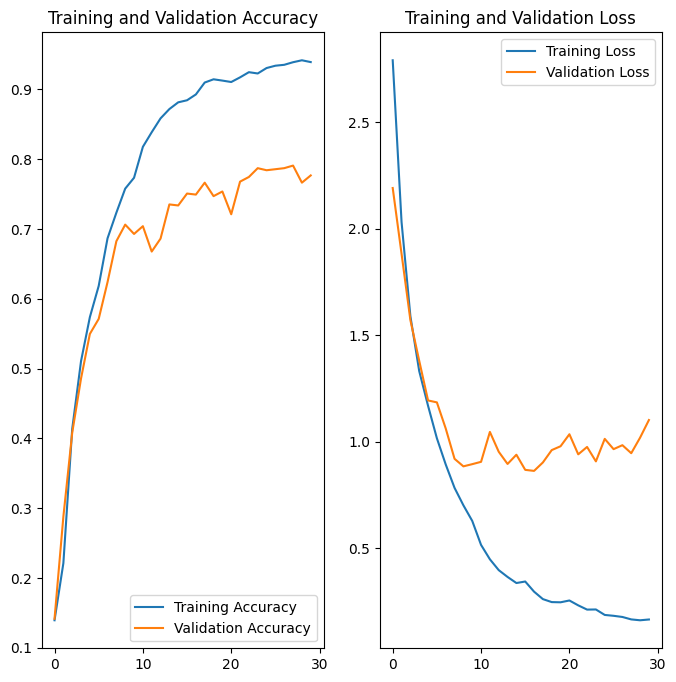

In [16]:
train_results(history_3)

Findings:
* As we can see, there is a very noticable difference in this model after **increasing the number of samples**.
* Although the model is still **overfitting**, but not as much as before.
* Also, the accuracy has increased significantly in both training and validation
* **Training** Accuracy went from **89%** to **94%**
* **Validation** Accuracy went from **30%** to **78%**

> I am going to try one more model by adding one more layer in it

### Model 4

Layers:
* Rescaling layer
*   1 Convolution layer with: **32 (3,3)** filters, Padding as '**same**'
* Pooling Layer
* Dropout Layer
*   1 Convolution layer with: **64 (3,3)** filters, Padding as '**same**'
*  ***NEW*** - 1 Convolution layer with: **64 (3,3)** filters, Padding as '**same**'
* Pooling Layer
* Dropouts Layer
* Flatten Layer
* Dense layer : **128** Neurons
* Final Softmax layer


In [13]:
## Building Model 4 with DROPOUTS
model_4 = Sequential()

model_4.add(layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=new_input_shape))   ## Rescaling
#Conv Layer 1
model_4.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_4.add(Conv2D(64, (3, 3), 2, padding='same', activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))    ## Dropout
#Conv Layer 2
model_4.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_4.add(Conv2D(32, (3, 3), 2, padding='same', activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))    ## Dropout
model_4.add(Flatten())        ## Flatten layer
#FC Layers
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.25))    ## Dropout
model_4.add(Dense(num_classes, activation='softmax'))

#Compile model
model_4.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)


In [23]:
#Fitting Model 4
epochs = 30
history_4 = model_4.fit(
    new_train_ds,
    validation_data = new_val_ds,
    epochs = epochs
)

Epoch 1/30
169/169 [==============================] - 368s 2s/step - loss: 2.0498 - accuracy: 0.2022 - val_loss: 1.8070 - val_accuracy: 0.2893
Epoch 2/30
169/169 [==============================] - 368s 2s/step - loss: 1.7695 - accuracy: 0.3032 - val_loss: 1.6241 - val_accuracy: 0.3739
Epoch 3/30
169/169 [==============================] - 383s 2s/step - loss: 1.6314 - accuracy: 0.3736 - val_loss: 1.4713 - val_accuracy: 0.4392
Epoch 4/30
169/169 [==============================] - 368s 2s/step - loss: 1.5015 - accuracy: 0.4292 - val_loss: 1.3397 - val_accuracy: 0.4874
Epoch 5/30
169/169 [==============================] - 386s 2s/step - loss: 1.3847 - accuracy: 0.4741 - val_loss: 1.2518 - val_accuracy: 0.5267
Epoch 6/30
169/169 [==============================] - 383s 2s/step - loss: 1.2833 - accuracy: 0.5145 - val_loss: 1.1918 - val_accuracy: 0.5660
Epoch 7/30
169/169 [==============================] - 367s 2s/step - loss: 1.1734 - accuracy: 0.5630 - val_loss: 1.0856 - val_accuracy: 0.6001

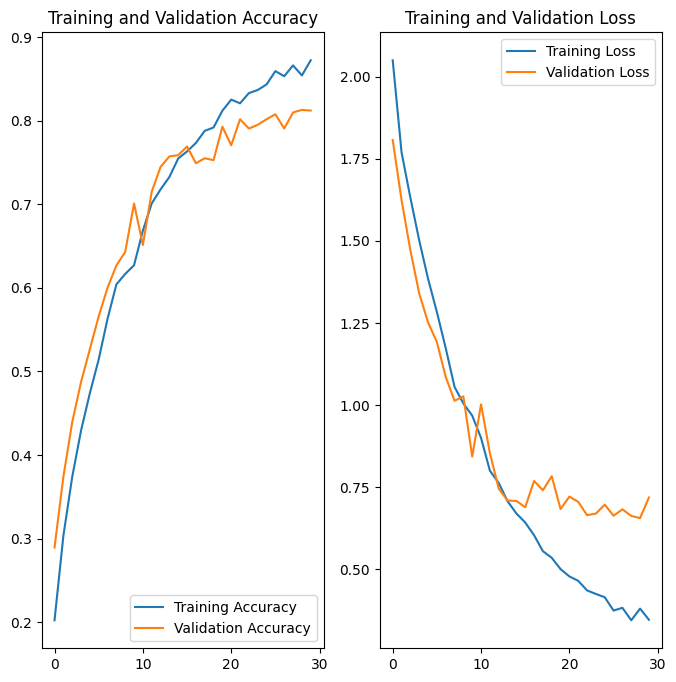

In [24]:
train_results(history_4)

**Findings:**
* Model-4 performed a little better than model-3.
* Training accuracy dropped by **6%** but validation accuracy **increased** by **3%** and came closed to training accuracy, that is we **reduced overfitting**.

## 5. Prediction
* On test data
* Using Model 4

In [25]:
#Importing test image dataset

test_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=img_size,
    batch_size=batch_size,
    seed=123,
    label_mode = 'categorical'
)

Found 118 files belonging to 9 classes.


In [26]:
### Using model 4 for prediction
predictions = model_4.predict(test_ds)

4/4 [==============================] - 23s 459ms/step


In [27]:
## Making true and predicted class labels list
predicted_labels = np.argmax(predictions, axis=1)
predicted_class_names = [class_names[label-1] for label in predicted_labels]

true_labels = []
for images, labels in test_ds:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

true_class_names = [class_names[label] for label in true_labels]


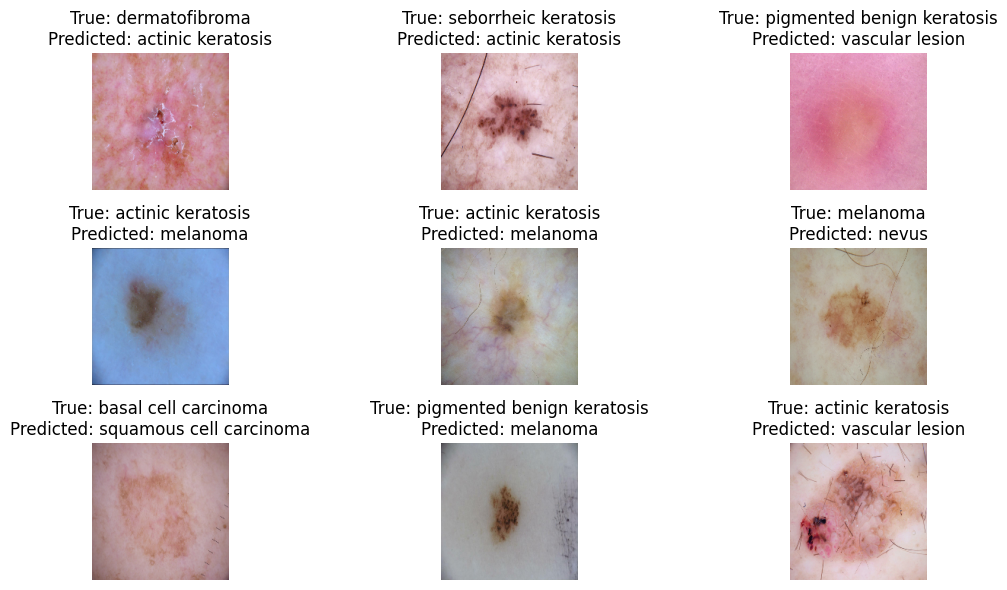

In [28]:
### Plotting predicted images examples

plt.figure(figsize=(12, 6))  # Set the figsize as desired
num_samples = 9  # Number of samples to visualize

for i in range(num_samples):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(next(iter(test_ds))[0][i].numpy().astype("uint8"))
    plt.title(f"True: {true_class_names[i]}\nPredicted: {predicted_class_names[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [29]:
### Check test accuracy
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
    predicted_labels.extend(np.argmax(model_3.predict(images), axis=1))

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

accuracy = np.mean(true_labels == predicted_labels)
print("Overall Accuracy:", accuracy)

1/1 [==============================] - 0s 425ms/step
Overall Accuracy: 0.3305084745762712


**Findings:**
* This model took 4 Hours to complete ☕
* Since the Model-3 did not have a good Validation accuracy, thus it is not performing well on Test dataset.
* And, giving an accuracy of **35%**

> Since 1 model takes a lot of time to complete, if there was more time, i could have tried more hyperparameter tuning or layer addition.

> But for now best i could built is Model-3


# <center> Thank You </Center>



---



---
